## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

Sun Jun 07 21:49:58 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 419.35       Driver Version: 419.35       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 965M   WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   47C    P8    N/A /  N/A |     37MiB /  2048MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
# 修正
def preproc_x(x, flatten=True):
    x = 2*(((x - x.min()) / (x.max() - x.min()))-0.5)
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""Code Here
建立你的神經網路
"""
# 修正神經網路
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 128, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total p

In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 140us/step - loss: 1.6901 - acc: 0.3963 - val_loss: 1.5727 - val_acc: 0.4440
Epoch 2/100
50000/50000 [==============================] - 4s 83us/step - loss: 1.4691 - acc: 0.4790 - val_loss: 1.4578 - val_acc: 0.4882
Epoch 3/100
50000/50000 [==============================] - 4s 84us/step - loss: 1.3587 - acc: 0.5202 - val_loss: 1.3985 - val_acc: 0.5094
Epoch 4/100
50000/50000 [==============================] - 4s 83us/step - loss: 1.2599 - acc: 0.5568 - val_loss: 1.3936 - val_acc: 0.5149
Epoch 5/100
50000/50000 [==============================] - 4s 84us/step - loss: 1.1794 - acc: 0.5852 - val_loss: 1.3921 - val_acc: 0.5126
Epoch 6/100
50000/50000 [==============================] - 4s 86us/step - loss: 1.1005 - acc: 0.6111 - val_loss: 1.3483 - val_acc: 0.5263
Epoch 7/100
50000/50000 [=

50000/50000 [==============================] - 4s 82us/step - loss: 0.1128 - acc: 0.9624 - val_loss: 3.5966 - val_acc: 0.5292
Epoch 56/100
50000/50000 [==============================] - 4s 85us/step - loss: 0.1194 - acc: 0.9610 - val_loss: 3.4833 - val_acc: 0.5305
Epoch 57/100
50000/50000 [==============================] - 4s 84us/step - loss: 0.1003 - acc: 0.9662 - val_loss: 3.6067 - val_acc: 0.5256
Epoch 58/100
50000/50000 [==============================] - 4s 85us/step - loss: 0.1081 - acc: 0.9630 - val_loss: 3.6200 - val_acc: 0.5237
Epoch 59/100
50000/50000 [==============================] - 4s 86us/step - loss: 0.0988 - acc: 0.9679 - val_loss: 3.6561 - val_acc: 0.5296
Epoch 60/100
50000/50000 [==============================] - 4s 84us/step - loss: 0.1030 - acc: 0.9668 - val_loss: 3.5776 - val_acc: 0.5313
Epoch 61/100
50000/50000 [==============================] - 4s 84us/step - loss: 0.1137 - acc: 0.9620 - val_loss: 3.6418 - val_acc: 0.5167
Epoch 62/100
50000/50000 [==============

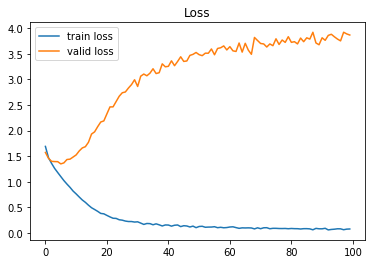

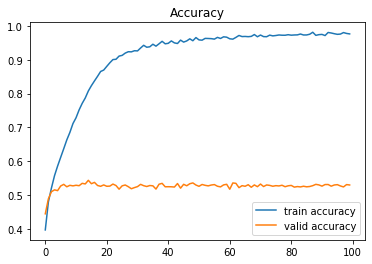

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()